In [51]:
import sys
print(sys.version)
from qiskit import *

IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q') # Get the IBM-Q Provider
backend = provider.get_backend('ibmqx2') # Target 'ibmqx2' for all upcomming backend work
print('Done')

3.6.6 (v3.6.6:4cf1f54eb7, Jun 27 2018, 03:37:03) [MSC v.1900 64 bit (AMD64)]
Done


# Simple qubit in super positision entangled with another qubit
### If correct, we should see a near 50/50 distrobution between 00 and 11, there will be some 01 and 10 noise, As expected.

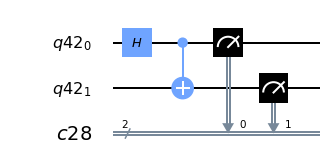

In [52]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [53]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


Result(backend_name='ibmqx2', backend_version='2.0.1', date=datetime.datetime(2019, 12, 8, 22, 5, 25, tzinfo=datetime.timezone.utc), execution_id='d2585d02-1a06-11ea-ad6d-ac1f6b91f43c', header=Obj(backend_name='ibmqx2', backend_version='2.0.1'), job_id='5ded738e9f0eeb00113654ee', qobj_id='405ec6ca-df23-4897-aaba-3ac542d0c832', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=447, 0x1=17, 0x2=24, 0x3=536)), header=Obj(clbit_labels=[['c28', 0], ['c28', 1]], creg_sizes=[['c28', 2]], memory_slots=2, n_qubits=5, name='circuit33', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, memory=False, shots=1024, success=True)], status='Successful completion', success=True, time_taken=7.308731317520142)


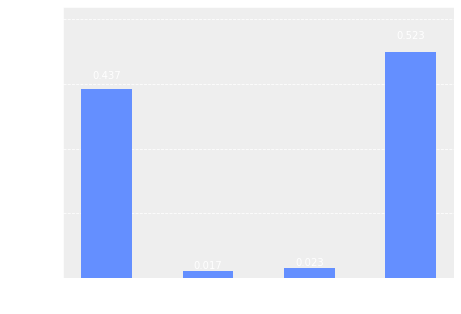

In [54]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)
print(result)
plot_histogram([counts])

# Lets invert one of the entangled qubits
### If correct, we should see a near 50/50 distrobution between 01 and 10, there will be some 00 and 11 noise, As expected.

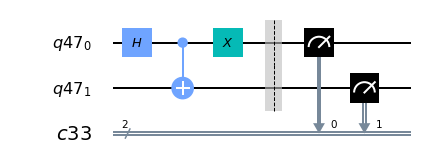

In [59]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.x(qr[0]) # Invert qr[0]
circuit.barrier(range(2)) # Sepperate the measurements to not ruin the entangled qubits
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [60]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


Result(backend_name='ibmqx2', backend_version='2.0.1', date=datetime.datetime(2019, 12, 8, 22, 11, 14, tzinfo=datetime.timezone.utc), execution_id='a2829cfe-1a07-11ea-812a-ac1f6b91f43c', header=Obj(backend_name='ibmqx2', backend_version='2.0.1'), job_id='5ded74f7f2fc57001263e9bc', qobj_id='ca5511b1-b375-475f-9445-51dcdf9e72b5', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=40, 0x1=425, 0x2=414, 0x3=145)), header=Obj(clbit_labels=[['c33', 0], ['c33', 1]], creg_sizes=[['c33', 2]], memory_slots=2, n_qubits=5, name='circuit39', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, memory=False, shots=1024, success=True)], status='Successful completion', success=True, time_taken=7.24198842048645)


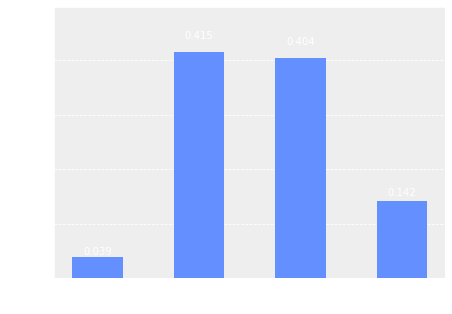

In [61]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)
print(result)
plot_histogram([counts])